In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
acd_l3 = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/ACD/run300_ACD.L3.h5"

In [3]:
acdfile = h5py.File(acd_l3,'r')

In [4]:
acdfile["EventID"]

<HDF5 dataset "EventID": shape (104908,), type "<i8">

In [5]:
acdfile.keys()

<KeysViewHDF5 ['Energy', 'EventID', 'Position', 'UTC']>

In [6]:
acdfile["Position"][0]

array([[  0.    ,   0.    ,   0.    ],
       [  8.5   ,  12.75  ,   0.8168],
       [  0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ],
       [  9.6   , -12.1   ,  20.5668]])

In [7]:
acdfile["Energy"][0]

array([   0.    , 9360.512 ,    0.    ,    0.    , 3657.0977],
      dtype=float32)

In [8]:
cudfile = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Tests_and_Debug/testing-cud2rr-acd/r300_cud_combined.CUD.h5"

In [9]:
cud= h5py.File(cudfile,'r')

In [10]:
cud.keys()

<KeysViewHDF5 ['Events', 'Summary']>

In [11]:
cud['Events/ACD'].keys()

<KeysViewHDF5 ['Energy', 'EventID', 'Position', 'UTC']>

In [12]:
cud['Events/ACD/EventID'],cud['Events/ACD/Energy'],cud['Events/ACD/Position']

(<HDF5 dataset "EventID": shape (104908,), type "<i8">,
 <HDF5 dataset "Energy": shape (104908, 5), type "<f4">,
 <HDF5 dataset "Position": shape (104908, 5, 3), type "<f8">)

In [13]:
cud['Events/CsI'].keys()

<KeysViewHDF5 ['EventID', 'erg', 'pos', 'time', 'use_erg', 'use_pos']>

In [14]:
czt_evta = cud["Events/CZT/EventID"][...]
czt_evt = czt_evta[np.where(czt_evta>0)]
csi_evt = cud["Events/CsI/EventID/EventID"][...]
acd_evt = cud['Events/ACD/EventID'][...]
trk_evt = cud['Events/TKR/EventID'][...]

In [19]:
czt_timea = cud["Events/CZT/EventTime"][...]
czt_time = czt_timea[np.where(czt_evta>0)]
csi_time = cud["Events/CsI/time/UTC"][...]/1e9
acd_time = cud["Events/ACD/UTC"][...]/1e9
trk_time = cud['Events/TKR/EventTime'][...]/1e9

In [20]:
#-- 1st event's start time --
temp_trk_strtime = trk_time[0]
temp_czt_strtime = czt_time[0]
temp_csi_strtime = csi_time[0]
temp_acd_strtime = acd_time[0]

temp_trk_strtime = np.min(trk_time)
temp_czt_strtime = np.min(czt_time)
temp_csi_strtime = np.min(csi_time)
temp_acd_strtime = np.min(acd_time)

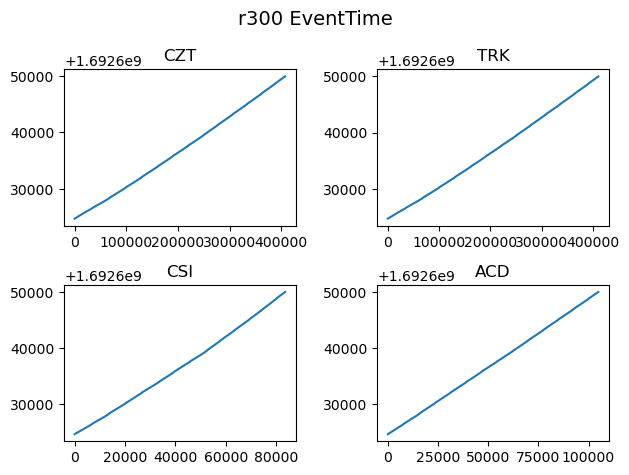

In [21]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Create a list of arrays
arrays = [czt_time, trk_time, csi_time, acd_time]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI', 'ACD']

# y_min = 0
# y_max = 3800
# y_gap = 1200

# Iterate through the subplots and arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    ax.plot(arrays[i])
    ax.set_title(labels[i])

fig.suptitle('r300 EventTime', fontsize=14)
# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Create a list of arrays
arrays = [czt_time-temp_czt_strtime, trk_time-temp_trk_strtime, csi_time-temp_csi_strtime, acd_time-temp_acd_strtime]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI', 'ACD']

# y_min = 0
# y_max = 3800
# y_gap = 1200

# Iterate through the subplots and arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    ax.plot(arrays[i])
    ax.set_title(labels[i])

fig.suptitle('r300 EventTime', fontsize=14)
# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
cud["Events/CsI/EventID"].keys()

<KeysViewHDF5 ['EventID']>

In [24]:
czt_evt = czt_evta[np.where(czt_evta>0)]

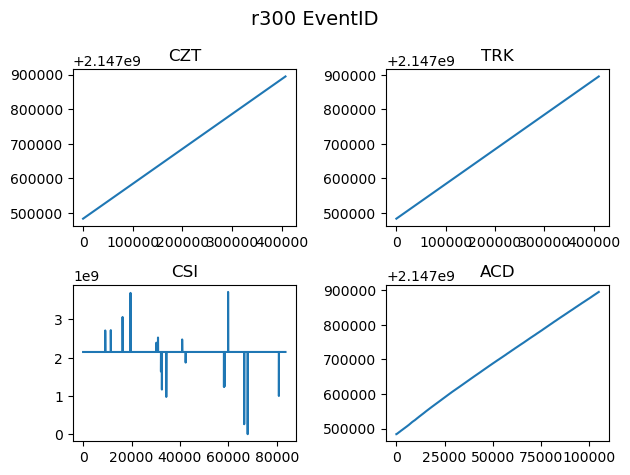

In [25]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)


# Create a list of arrays
arrays = [czt_evt, trk_evt, csi_evt, acd_evt]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI', 'ACD']

# Iterate through the subplots and arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    ax.plot(arrays[i])
    ax.set_title(labels[i])

fig.suptitle('r300 EventID', fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Arrays for the data and corresponding time values
data_arrays = [czt_evt, trk_eventid, csi_evt, acd_evt]
time_arrays = [czt_time-temp_czt_strtime, trk_time-temp_trk_strtime, csi_time-temp_csi_strtime, acd_time-temp_acd_strtime]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI', 'ACD']

# Iterate through the subplots, data arrays, and time arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    data = data_arrays[i]
    time = time_arrays[i]
    label = labels[i]
    
    ax.plot(data, time)
    ax.set_title(label)
    ax.set_xlabel('evtid')  # Set x-axis label as 'Time'
    ax.set_ylabel('time')  # Set y-axis label as 'Value'

fig.suptitle('r300 Time vs EventID', fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


ValueError: x and y must have same first dimension, but have shapes (410524,) and (157599,)

# Testing cud2rr acd

In [ ]:
acd_evt = cud['Events/ACD/EventID'][...]
acd_nrg = cud['Events/ACD/Energy'][...]
acd_pos = cud['Events/ACD/Position'][...]
        

In [ ]:
def get_acd_hits(acd_ene_arr, acd_pos_arr):
    
    hit_acd_ene = []
    hit_acd_xpos = []
    hit_acd_ypos = []
    hit_acd_zpos = []

    print(acd_ene_arr.shape[0])
       
    for acd_panel in range(acd_ene_arr.shape[0]): 

        if acd_ene_arr[acd_panel] > 0.0:
            hit_acd_ene.append(acd_ene_arr[acd_panel])
            hit_acd_xpos.append(acd_pos_arr[acd_panel,0])
            hit_acd_ypos.append(acd_pos_arr[acd_panel,1])
            hit_acd_zpos.append(acd_pos_arr[acd_panel,2])
        
    
    return np.array(hit_acd_ene), np.array(hit_acd_xpos), np.array(hit_acd_ypos), np.array(hit_acd_zpos)


In [ ]:
for i in range(3):
    acd_ene_arr = acd_nrg[i]
    acd_pos_arr = acd_pos[i]

    print(acd_ene_arr, acd_pos_arr.size)
    
    hit = get_acd_hits(acd_ene_arr,acd_pos_arr)
    print(hit)

# Tracker Time

In [28]:
trk_time = cud['Events/TKR/EventTime']

In [29]:
trk_nrg = cud['Events/TKR/Energy']

In [30]:
trk_nrg, trk_time

(<HDF5 dataset "Energy": shape (344529, 6), type "<f8">,
 <HDF5 dataset "EventTime": shape (410524,), type "<u8">)

# Cud2rr selection

In [31]:
czt_evta = cud["Events/CZT/EventID"][...]
csi_evt = cud["Events/CsI/EventID/EventID"][...]
acd_evt = cud['Events/ACD/EventID'][...]
trk_evt = cud['Events/TKR/EventID'][...]

In [32]:
czt_evta = cud["Events/CZT/EventID"][...]
czt_evt = czt_evta[np.where(czt_evta>0)]
csi_evt = cud["Events/CsI/EventID/EventID"][...]
acd_evt = cud['Events/ACD/EventID'][...]
# trk_evt = cud['Events/TKR/EventID'][...]
trk_nrg = cud["Events/TKR/Energy"][...]
trk_eventid = cud['Events/TKR/EventID'][...] 
trk_nr_id =trk_nrg[:,0]   # Tracker ID from the energy dataset 
trk_evt =  trk_nr_id

In [36]:
#=== Time ====
czt_timea = cud["Events/CZT/EventTime"][...]
czt_time = czt_timea[np.where(czt_evta>0)]
csi_time = cud["Events/CsI/time/UTC"][...]/1e9
acd_time = cud["Events/ACD/UTC"][...]/1e9
trk_time_all = cud['Events/TKR/EventTime'][...]/1e9


In [37]:
trk_indices = np.where(np.isin(trk_eventid, trk_evt))
trk_indices = np.concatenate(trk_indices)
trk_indices.shape

(157599,)

In [38]:
trk_time = trk_time_all[trk_indices]
trk_time.shape

(157599,)

In [39]:
#-- 1st event's start time --
temp_trk_strtime = np.min(trk_time)
temp_czt_strtime = np.min(czt_time)
temp_csi_strtime = np.min(csi_time)
temp_acd_strtime = np.min(acd_time)
start_time_sec = min(temp_trk_strtime,temp_czt_strtime,temp_csi_strtime, temp_acd_strtime)
start_time_sec

1692624721

In [40]:
temp_trk_strtime, temp_czt_strtime,temp_csi_strtime,temp_acd_strtime

(1692624721.8958213, 1692624721, 1692624721.9502969, 1692624722.2171488)

In [41]:
plt.plot(czt_time-temp_czt_strtime)

In [42]:
delme_arr = np.union1d(trk_evt,czt_evt)
delme_arr1= np.union1d(delme_arr,acd_evt)
uniq_evt_id_arr = np.union1d(delme_arr1,csi_evt)
n_evts = uniq_evt_id_arr.shape[0]

In [127]:
n_evts

409877

In [128]:
trk_nr_id.shape, cud["Events/TKR/Energy"]

((344529,), <HDF5 dataset "Energy": shape (344529, 6), type "<f8">)

In [129]:
for i in range(98090,n_evts):
    tid =  uniq_evt_id_arr[i]

    if tid == 0: # We want to skip the event id which are 0s.
            continue
    print(tid, i)
    tloc = np.where(trk_nr_id == tid)
    if len(tloc[0])>0:
        print('trk', tloc)
        evttime = (trk_time [tloc] - start_time_sec)
        
                    
    tloc = np.where(acd_evt == tid)
    if len(tloc[0])>0:
        evttime = (acd_time[tloc[0]]  -start_time_sec)
        print('acd',evttime,acd_time[tloc[0]])

    tloc = np.where(czt_evt == tid)
    if len(tloc[0])>0:
        
        evttime = (czt_time[tloc[0]]  -start_time_sec)
        print('czt',evttime,czt_time[tloc[0]])

    tloc = np.where(csi_evt == tid)
    if len(tloc[0])>0:
        
        evttime = (csi_time[tloc[0]]  -start_time_sec)
        print('csi',evttime,csi_time[tloc[0]])

2147581963.0 98090
acd [1.69236798e+09] [1.69263012e+09]
czt [0.00443936] [262147.45351998]
2147581964.0 98091
czt [0.00443936] [262147.45351998]
2147581965.0 98092
trk (array([240093, 240094]),)
czt [0.00443936] [262147.45351998]
csi [1.69236798e+09] [1.69263012e+09]
2147581966.0 98093
trk (array([240095, 240096]),)
acd [1.69236798e+09] [1.69263012e+09]
czt [0.00443936] [262147.45351998]
2147581967.0 98094
trk (array([240097]),)
czt [0.00443936] [262147.45351998]
2147581968.0 98095
trk (array([240098, 240099, 240100]),)
acd [1.69236798e+09] [1.69263012e+09]
czt [0.00443936] [262147.45351998]
2147581969.0 98096
trk (array([240101]),)
2147581970.0 98097
czt [0.00443936] [262147.45351998]
2147581971.0 98098
trk (array([240102, 240103]),)
czt [0.00443936] [262147.45351998]
2147581972.0 98099
trk (array([240104, 240105]),)
czt [0.00443936] [262147.45351998]
2147581973.0 98100
czt [0.00443936] [262147.45351998]
2147581974.0 98101
czt [0.00443936] [262147.45351998]
2147581975.0 98102
czt [0.

KeyboardInterrupt: 

# Grabbing tracker time array for nrg event id

In [39]:
trk_evt.shape

(344529,)

In [43]:

trk_eventid.shape

(410524,)

In [44]:
trk_time.shape

(410524,)

In [45]:
indices = np.where(np.isin(trk_eventid, trk_evt))

In [47]:
new_trk_time=trk_time[indices]

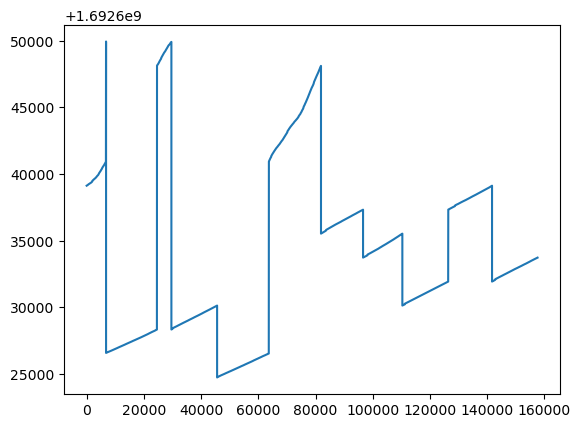

In [48]:
plt.plot(new_trk_time)

In [115]:
trk_eventid = np.array([1, 2, 3, 4, 5, 6, 7])
trk_evt = np.array([2, 4, 4, 6])

# Find the indices in trk_eventid for elements of trk_evt (with duplicates)
trk_indices = np.where(np.isin(trk_eventid, trk_evt))

# Convert the result to a 1D array
trk_indices = np.concatenate(trk_indices)
trk_indices

array([1, 3, 5])

In [117]:
trk_indices = []
for i in trk_evt:
    indices = np.where(trk_eventid == i)[0]
    trk_indices.extend(indices)

np.array(trk_indices)

array([1, 3, 3, 5])

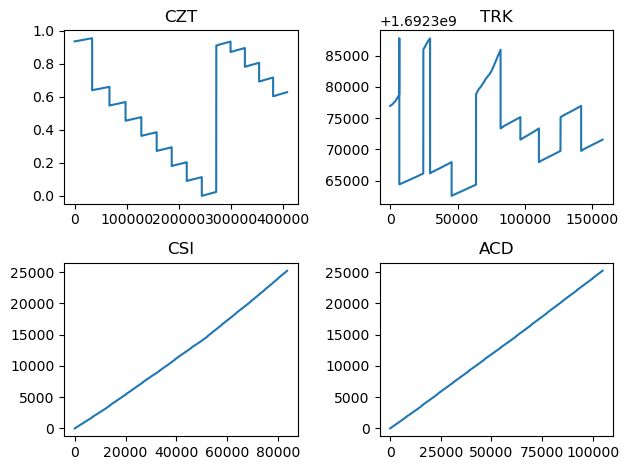

In [219]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Create a list of arrays
arrays = [czt_time-temp_czt_strtime, trk_time-temp_czt_strtime, csi_time-temp_csi_strtime, acd_time-temp_acd_strtime]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI', 'ACD']

# Iterate through the subplots and arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    ax.plot(arrays[i])
    ax.set_title(labels[i])

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [263]:
import argparse
import os
import glob
import h5py
import numpy as np

In [264]:
def get_files_with_extension(folder_path, extension='.tdata'):
    """
    Get a list of files with a specific extension in the given folder path.

    Parameters:
        folder_path (str): The path to the folder.
        extension (str): The file extension to filter the files (default: '.L3').

    Returns:
        List[str]: A list of file paths with the specified extension.
    """
    file_pattern = os.path.join(folder_path, f'*{extension}')
    files_with_extension = glob.glob(file_pattern)
    return files_with_extension

In [265]:
infolder = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR"
# Get files with the '.L3' extension in the specified folder
files = get_files_with_extension(infolder)
if len(files) <= 1:
     raise FileNotFoundError("No L3 Files in directory. Please choose the right directory.")

In [266]:
files

['/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692635521.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692633721.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692630121.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692637321.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692631921.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692624719.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692640921.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692642721.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692644521.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692646321.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692648

In [267]:
sorted(files)

['/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692624719.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692626521.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692628321.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692630121.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692631921.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692633721.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692635521.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692637321.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692639120.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692640921.tdata',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run300/TKR/1692642

In [268]:
a = [1, 11, 12, 20, 2, 3]

In [269]:
sorted(a)

[1, 2, 3, 11, 12, 20]

In [274]:
b = ['a1', 'a11', 'a12', 'a21', 'a2', 'a3']
b

['a1', 'a11', 'a12', 'a21', 'a2', 'a3']

In [273]:
sorted(b)

['a1', 'a11', 'a12', 'a2', 'a21', 'a3']